In [14]:
import pandas as pd
from ipynb.fs.full.functions import clean_up, tokenize, stem_and_lemmatize, remove_stopwords
import re

In [55]:
pd.set_option('display.max_colwidth', -1)
#pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [3]:
df1 = pd.read_csv("healthyliving.csv")
df2 = pd.read_csv("healthylifestyle.csv")


In [4]:
df1.shape

(5000, 8)

In [5]:
df2.shape

(8134, 8)

In [7]:
df2.tail()

,alt,firstComment,imageUrl,likesCount,locationName,ownerUsername,timestamp,url
8129,"Image may contain: one or more people and outdoor, possible text that says 'Leg pain from fibroids: how to get relief'","🔵 Leg Pain From Fibroids: How to Get Relief\n⠀\nThe leg pain that is associated with fibroids is typically due to subserosal (or large intramural) fibroids that are located in the back (posterior) aspect of the uterus. These hard and firm tumors compress the pelvic nerves which may include the sciatic nerve resulting in sciatica pain that is felt in the leg.\n⠀\nIf the symptoms correlate with the location and size of the fibroids, then treating the fibroids should relieve these symptoms. Uterine fibroid embolization (UFE) is an outstanding treatment for getting the relief of fibroid-related symptoms.\n⠀\n🔹If you suspect that you may have uterine fibroids and are not receiving all the answers from your doctor, ask Dr. John Lipman of the Atlanta Fibroid Center for a second opinion. Call to make an appointment: 770-727-2631\n⠀\n#DontLoseUrU🍀",https://scontent-iad3-1.cdninstagram.com/v/t51.2885-15/e35/70254793_417794689096014_2091543836466137290_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com&_nc_cat=106&_nc_ohc=JuOoyqhkbG4AX9Yqrdt&oh=137d94c64ff999db6ea19546649e4e60&oe=5EA3B751,12,NaN,NaN,2019-11-18T11:25:07.000Z,https://www.instagram.com/p/B5AUh_0hBGn
8130,"Image may contain: one or more people, possible text that says 'What are the risks of UFE?'","🔵 From a risk profile, UFE is safer than the surgical options for fibroids treatment. The main risks of the UFE procedure are as follows:\n⠀\n➡️ 1. Menopause: Roughly 2% of women will go into menopause after UFE. The large majority of these women are over 45 years of age. A much smaller percentage of women enter menopause after UFE that are between 40 and 45 years of age. No one under 40 years of age, in our experience, has experienced menopause after UFE treatment.\n⠀\n➡️ 2. Fibroid slough: Roughly 5% of patients will slough fibroid tissue with menses temporarily after UFE. The material is from a fibroid that is near the lining and falls into the cavity and passed in pieces after the UFE. This is not concerning, except that it is important to tell patients about this so that they are not alarmed if they see this after UFE. On very rare occasions (~2-3 per 1,000 patients), the material is in the cavity, but a woman cannot pass it. Symptoms of sudden, sharp pain, fever, and a foul malodorous discharge alert the women of this occurrence and the Interventional Radiologist should be immediately notified. The patient is placed on antibiotic therapy and watched closely for ~24 hours. If she passes the material, no further steps are taken. If she cannot pass the material, an elective outpatient D&C-like procedure with her gynecologist may be necessary to deliver this material. On rare occasions, surgical removal of the offending fibroid or a hysterectomy may be needed.\n⠀\n➡️ 3. Allergy to the contrast: Rarely, patients will be allergic to the x-ray contrast. If this is known from a prior exposure to contrast, the patient will be placed on a steroid regimen beginning the day before the procedure to block this reaction. In the very rare event that a reaction occurs, patients are given medicine to reverse and stop it.\n⠀\n➡️ 4. Undetected cancer: Rarely, cancer can be present in the uterus and is not detected by any test or imaging. (Approximately 1 in 2,000 cases).\n⠀\n⚫ If you would like a second opinion regarding your fibroids before deciding on surgery, make an appointment with Dr. John Lipman by calling the Atlanta Fibroid Center at 770-953-2600.\n⠀\n#DontLoseUrU🍀",https://scontent-iad3-1.cdninstagram.com/v/t51.2885-15/e35/75266918_2722661861131741_6907967573183167977_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com&_nc_cat=101&_nc_ohc=ShPW2fg3FPEAX8Mk2PJ&oh=8b46d3d40ed30b09276adab0698d639e&oe=5E9E3B21,6,NaN,NaN,2019-11-17T11:58:03.000Z,https://www.instagram.com/p/B49zgZGB7LK
8131,Image may

In [8]:
df2.alt.head()

0    NaN                                                          
1    Image may contain: shoes                                     
2    Image may contain: possible text that says 'WORLD KIDNEY DAY'
3    Image may contain: sky, cloud and outdoor                    
4    Image may contain: food                                      
Name: alt, dtype: object

In [9]:
## checking null values
df1.isnull().sum()

alt              316 
firstComment     18  
imageUrl         0   
likesCount       0   
locationName     5000
ownerUsername    5000
timestamp        0   
url              0   
dtype: int64

In [10]:
df2.isnull().sum()

alt              780 
firstComment     84  
imageUrl         0   
likesCount       0   
locationName     8134
ownerUsername    8134
timestamp        0   
url              0   
dtype: int64

In [11]:
### dropping some columns
df1.drop(columns = ["locationName", "ownerUsername","imageUrl", "url"],axis=1, inplace = True)
df2.drop(columns = ["locationName", "ownerUsername", "imageUrl", "url"],axis=1, inplace = True)


In [ ]:
# dropping rows where 

In [12]:
#concatenating the datasets
instagram = pd.concat([df1,df2],axis = 0)

In [27]:
# types
instagram.dtypes

alt             object
firstComment    object
likesCount      int64 
timestamp       object
dtype: object

In [13]:
instagram.head()

,alt,firstComment,likesCount,timestamp
0,Image may contain: one or more people and text,"The best offense is a good defense so here's some healthy tips on how to boast your immunity as work through this Covid-19 scare.\n.\nDon't be scared, just take care.",1,2020-03-12T14:32:48.000Z
1,Sacred geometry flower of life and goddess artwork,"Nature reflects back to us our own imbalance. When the health of the earth and ecosystems are compromised, our own health is also compromised. We are a part of Nature, and her sickness becomes our sickness ~ her health, our health 🌏 Art: @mimbirose #sacredgeometryart #seedoflife #floweroflife #cyclesofnature",2,2020-03-12T14:22:34.000Z
2,Image may contain: 1 person,"Concerning the current outbreak of Covid-19 (Coronavirus), which has now been declared as a pandemic, we must take precautions and safety measures to avoid its spread. Even a simple handshake can cause the transfer of harmful disease-causing bacteria.\n\nA safe way to greet others is through Namaste, a customary and respectful Indian greeting, which is also a part of Atmantan's culture 🙏🏻 #Atmantan #BeTransformed #AtmantanWellnessResort",24,2020-03-12T14:17:54.000Z
3,Image may contain: food,Lunch out today with my daughter😀 jacket potato with tuna and cheese HEA and speedy salad 🥒🍅🥔#slimmingworld#slimmingworldblog#weightlossjourney#weighlossjourney2020#slimmingworldblogger#healthylifestyle#healthyeating#healthyliving#diet#sw#healthylivingjourney,3,2020-03-12T14:17:02.000Z
4,"Image may contain: sky, mountain, outdoor, water and nature","Whenever you are faced with fear, you always have a choice.\nFear is something we all have faced and will face it again. It’s inevitable and something needs to change.\n\nDon't let fear win and over power you. Believe that you are strong and capable. ""Forget Everything and Run,’ or, ‘Face Everything and Rise."" The choice is yours.\n\n#choiceisyours #choiceschoices #criticschoice #hardchoices #mindsetchange #mindsetofachampion #selfreflections #selfawareness #mortgageloanofficer #mortgagebanker #mortgageagent #teacherofinstagram #teacherblogger #nurseofinstagram #fitnesshelp #healthylivingjourney #fitmomsclub #getfitforlife #fitmominspire #timefreedom #workfromhomedad #selfemployedlife #goalslayer #workforwhatyouwant #helpinghands #givingback #careforothers #makeadifference #makeanimpact #peoplematter",1,2020-03-12T14:01:39.000Z


In [40]:
instagram.isnull().sum()

alt             1096
firstComment    102 
likesCount      0   
timestamp       0   
hashtags        0   
dtype: int64

In [41]:
# removing Nan Rows
instagram.dropna(subset=["firstComment"], inplace = True)

In [42]:
instagram.isnull().sum()

alt             1069
firstComment    0   
likesCount      0   
timestamp       0   
hashtags        0   
dtype: int64

In [ ]:
# creating a column for hashtags

In [20]:
def get_hashtag(s):
    return re.findall(r"#([a-z]+)", s)

In [43]:
instagram["hashtags"] = instagram.firstComment.apply(str).apply(lambda x: get_hashtag(x))

In [44]:
instagram.head()

,alt,firstComment,likesCount,timestamp,hashtags
0,Image may contain: one or more people and text,"The best offense is a good defense so here's some healthy tips on how to boast your immunity as work through this Covid-19 scare.\n.\nDon't be scared, just take care.",1,2020-03-12T14:32:48.000Z,[]
1,Sacred geometry flower of life and goddess artwork,"Nature reflects back to us our own imbalance. When the health of the earth and ecosystems are compromised, our own health is also compromised. We are a part of Nature, and her sickness becomes our sickness ~ her health, our health 🌏 Art: @mimbirose #sacredgeometryart #seedoflife #floweroflife #cyclesofnature",2,2020-03-12T14:22:34.000Z,"[sacredgeometryart, seedoflife, floweroflife, cyclesofnature]"
2,Image may contain: 1 person,"Concerning the current outbreak of Covid-19 (Coronavirus), which has now been declared as a pandemic, we must take precautions and safety measures to avoid its spread. Even a simple handshake can cause the transfer of harmful disease-causing bacteria.\n\nA safe way to greet others is through Namaste, a customary and respectful Indian greeting, which is also a part of Atmantan's culture 🙏🏻 #Atmantan #BeTransformed #AtmantanWellnessResort",24,2020-03-12T14:17:54.000Z,[]
3,Image may contain: food,Lunch out today with my daughter😀 jacket potato with tuna and cheese HEA and speedy salad 🥒🍅🥔#slimmingworld#slimmingworldblog#weightlossjourney#weighlossjourney2020#slimmingworldblogger#healthylifestyle#healthyeating#healthyliving#diet#sw#healthylivingjourney,3,2020-03-12T14:17:02.000Z,"[slimmingworld, slimmingworldblog, weightlossjourney, weighlossjourney, slimmingworldblogger, healthylifestyle, healthyeating, healthyliving, diet, sw, healthylivingjourney]"
4,"Image may contain: sky, mountain, outdoor, water and nature","Whenever you are faced with fear, you always have a choice.\nFear is something we all have faced and will face it again. It’s inevitable and something needs to change.\n\nDon't let fear win and over power you. Believe that you are strong and capable. ""Forget Everything and Run,’ or, ‘Face Everything and Rise."" The choice is yours.\n\n#choiceisyours #choiceschoices #criticschoice #hardchoices #mindsetchange #mindsetofachampion #selfreflections #selfawareness #mortgageloanofficer #mortgagebanker #mortgageagent #teacherofinstagram #teacherblogger #nurseofinstagram #fitnesshelp #healthylivingjourney #fitmomsclub #getfitforlife #fitmominspire #timefreedom #workfromhomedad #selfemployedlife #goalslayer #workforwhatyouwant #helpinghands #givingback #careforothers #makeadifference #makeanimpact #peoplematter",1,2020-03-12T14:01:39.000Z,"[choiceisyours, choiceschoices, criticschoice, hardchoices, mindsetchange, mindsetofachampion, selfreflections, selfawareness, mortgageloanofficer, mortgagebanker, mortgageagent, teacherofinstagram, teacherblogger, nurseofinstagram, fitnesshelp, healthylivingjourney, fitmomsclub, getfitforlife, fitmominspire, timefreedom, workfromhomedad, selfemployedlife, goalslayer, workforwhatyouwant, helpinghands, givingback, careforothers, makeadifference, makeanimpact, peoplematter]"


In [ ]:
# Now only hashtags

In [48]:
hashtags = instagram["hashtags"].explode()

In [91]:
hashtags1 = hashtags.value_counts().head(25).index.tolist()
hashtags1

['healthylifestyle',
 'healthyliving',
 'healthyfood',
 'fitness',
 'healthy',
 'healthylifestylechange',
 'healthyeating',
 'healthylifestylecoach',
 'healthylivingtips',
 'healthylifestylechanges',
 'healthylifestylechoices',
 'healthylifestyles',
 'healthylifestylemovement',
 'arbonne',
 'health',
 'healthylifestylejourney',
 'healthylifestyletips',
 'nutrition',
 'healthylivingrevolution',
 'weightloss',
 'healthylifestyleblogger',
 'vegan',
 'healthylifestylesolutions',
 'fitnessmotivation',
 'healthylifestylenot']

# Visualisation

In [58]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
text = ' '.join(hashtags1)

In [93]:
text

'healthylifestyle healthyliving healthyfood fitness healthy healthylifestylechange healthyeating healthylifestylecoach healthylivingtips healthylifestylechanges healthylifestylechoices healthylifestyles healthylifestylemovement arbonne health healthylifestylejourney healthylifestyletips nutrition healthylivingrevolution weightloss healthylifestyleblogger vegan healthylifestylesolutions fitnessmotivation healthylifestylenot'

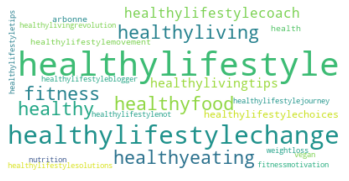

In [94]:

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
instagram.to_csv("instagram.csv")
hashtags.to_csv("hashtags.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
